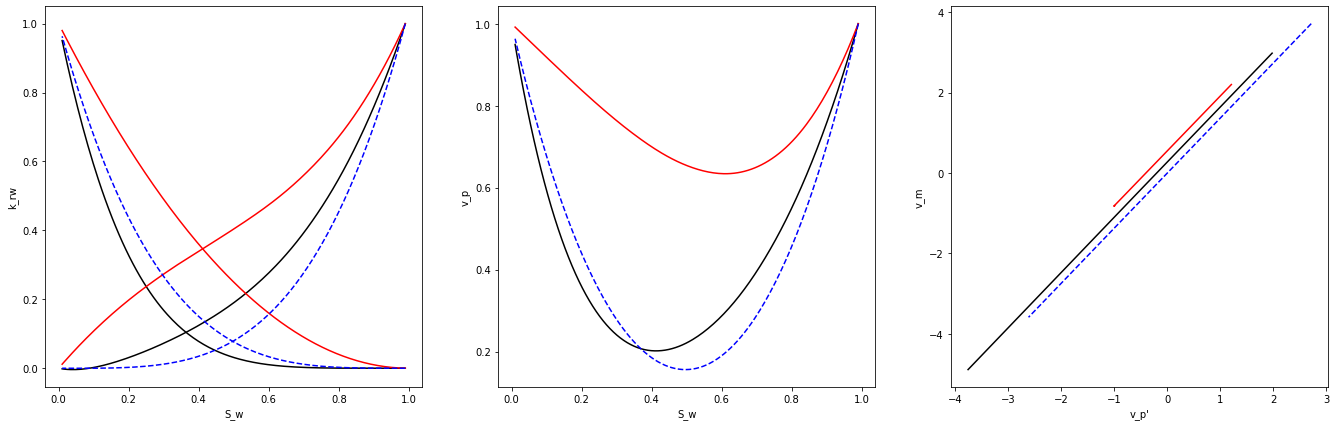

In [47]:
###

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

 

kr_w0 = np.array([1]) # End-point kr_w and initial value
kr_w02 = np.array([1]) # End-point kr_w and initial value

b = 0.73 # n_b = 3.7 is the corresponding exp for symmetric Corey curves with a = 0.
kr_n0 = 1 # End-point relperm
M = 1.0 # Visc match


n_o1 = 5.0
a1 = -0.2

n_o2 = 2.0
a2 = -0.4  # TR: Assume this is symmetric around 0: a > 0 if n_o < n_b

n_o3 = 3.71
a3 = -0.0



f  = lambda sw, k_rw : 1/(1-b) * (k_rw/sw + (b*(-1)*kr_n0*n_o1
                                            - (kr_n0*(n_o1-1)*(-1)))*(1.0 - sw)**(n_o1-1) + a1)

f2 = lambda sw, k_rw : 1/(1-b) * (k_rw/sw + (b*(-1)*kr_n0*n_o2
                                            - (kr_n0*(n_o2-1)*(-1)))*(1.0 - sw)**(n_o2-1) + a2)

f3 = lambda sw, k_rw : 1/(1-b) * (k_rw/sw + (b*(-1)*kr_n0*n_o3
                                            - (kr_n0*(n_o3-1)*(-1)))*(1.0 - sw)**(n_o3-1) + a3)



sw_span = (0.99, 0.01)

sw_eval = np.linspace(0.99, 0.01, 200)

 

sol = solve_ivp(f, sw_span, kr_w0, t_eval=sw_eval)
sol2 = solve_ivp(f2, sw_span, kr_w02, t_eval=sw_eval)
sol3 = solve_ivp(f3, sw_span, kr_w0, t_eval=sw_eval)

v_p1 = kr_n0*(1-sol.t)**(n_o1) + sol.y[0]
v_p2 = kr_n0*(1-sol2.t)**(n_o2) + sol2.y[0]
v_p3 = kr_n0*(1-sol3.t)**(n_o3) + sol3.y[0]

v_p1_diff = np.diff(v_p1) / np.diff(sol.t)
v_p2_diff = np.diff(v_p2) / np.diff(sol2.t)
v_p3_diff = np.diff(v_p3) / np.diff(sol3.t)

v_m1 = (sol.t[:-1] * (np.diff(sol.y[0]/sol.t) / np.diff(sol.t)) + 
        (1-sol.t[:-1]) * (np.diff(kr_n0*(1-sol.t)**(n_o1) / (1-sol.t)) / np.diff(sol.t)))
v_m2 = (sol2.t[:-1] * (np.diff(sol2.y[0]/sol2.t) / np.diff(sol2.t)) + 
        (1-sol2.t[:-1]) * (np.diff(kr_n0*(1-sol2.t)**(n_o2) / (1-sol2.t)) / np.diff(sol2.t)))
v_m3 = (sol3.t[:-1] * (np.diff(sol3.y[0]/sol3.t) / np.diff(sol3.t)) + 
        (1-sol3.t[:-1]) * (np.diff(kr_n0*(1-sol3.t)**(n_o3) / (1-sol3.t)) / np.diff(sol3.t)))


#
plt.figure(figsize=(23,7))

plt.subplot(131)
plt.plot(sol.t, sol.y[0], c='k')
plt.plot(sw_eval, kr_n0*(1-sw_eval)**n_o1, c='k')

plt.plot(sol2.t, sol2.y[0], c='r')
plt.plot(sw_eval, kr_n0*(1-sw_eval)**n_o2, c='r')

plt.plot(sol3.t, sol3.y[0], '--b')
plt.plot(sw_eval, kr_n0*(1-sw_eval)**n_o3, '--b')

#plt.legend(['n_o = 5', 'n_o = 2', 'n_o = 3.71'])
plt.ylabel("k_rw")
plt.xlabel("S_w")


plt.subplot(132)

plt.plot(sol.t, v_p1, color='k')
plt.plot(sol2.t, v_p2, color='r')
plt.plot(sol3.t, v_p3, '--b')

plt.ylabel("v_p")
plt.xlabel("S_w")


plt.subplot(133)
plt.plot(v_m1, v_p1_diff, color='k')
plt.plot(v_m2, v_p2_diff, color='r')
plt.plot(v_m3, v_p3_diff, '--b')

plt.ylabel("v_m")
plt.xlabel("v_p'")


plt.show()